# Домашнее задание №3.
## Pandas

---
**Выполнила:** Халфина Айсылу Зуфаровна

**Группа:** НПМбд-02-19

---

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В каждом разделе вам предлагается выполнить несколько заданий. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотекам pandas и matplotlib.

## 1. Табличные данные и Pandas

In [151]:
%pylab inline  
# import almost all we need
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [152]:
data = pd.read_csv('data.csv')
data.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


В таблице 4621 строка. Таблица содержит идентификатор заказа, количество заказанных блюд, наименование блюд, их состав и цену.

#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [153]:
orders = data.order_id.nunique()
unique_items = data.item_name.nunique()
print('Количество заказов:', orders)
print('Количество уникальных категорий:', unique_items)

Количество заказов: 1834
Количество уникальных категорий: 50


#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [154]:
if data.isnull().any().any():
    print('Пропуски присутствуют в столбцах:', end = ' ')
    nulls = data.isnull().sum().to_frame()
    for index, row in nulls.iterrows():
        if row[0] > 0:
            print(index, end = ' ')
else:
    print('Пропуски отсутствуют')  

Пропуски присутствуют в столбцах: choice_description 

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [155]:
for i in data.columns:
    if np.dtype(data[i]) == int64:
        data[i].fillna(0, inplace = True)
    if np.dtype(data[i]) == object:
        data[i].fillna(value = '', inplace = True)

#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [156]:
print(f"Тип колонки с ценой товара: {np.dtype(data.item_price)}")

def modify_price(old_price):
    return float(old_price[1:])

data['float_price'] = data['item_price'].apply(modify_price)

Тип колонки с ценой товара: object


Какая средняя/минимальная/максимальная цена у товара?

In [157]:
data['price_for_one_item'] = data['float_price'] / data['quantity']

print('Средняя цена:', round(mean(data['price_for_one_item']), 2))
print('Минимальная цена:', min(data['price_for_one_item']))
print('Максимальная цена:', max(data['price_for_one_item']))

Средняя цена: 7.08
Минимальная цена: 1.09
Максимальная цена: 11.89


Удалите старую колонку с ценой.

In [158]:
data.drop('item_price', axis = 1, inplace = True)

#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [159]:
unique_items = data.drop_duplicates("item_name").sort_values(by = "price_for_one_item")
print("Самые дешёвые товары:")
unique_items.head(5)

Самые дешёвые товары:


,order_id,quantity,item_name,choice_description,float_price,price_for_one_item
34,17,1,Bottled Water,,1.09,1.09
18,9,2,Canned Soda,[Sprite],2.18,1.09
263,114,1,Canned Soft Drink,[Coke],1.25,1.25
6,3,1,Side of Chips,,1.69,1.69
40,19,1,Chips,,2.15,2.15


In [160]:
print("Самые дорогие товары:")
unique_items.tail(5)

Самые дорогие товары:


,order_id,quantity,item_name,choice_description,float_price,price_for_one_item
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
168,75,1,Barbacoa Crispy Tacos,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",11.75,11.75
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89,11.89
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,11.89
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78,11.89


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [161]:
chicken_bow_orders = data[(data['item_name'] == 'Chicken Bowl') & (data['quantity'] > 1)]
print(f"Клиенты покупали больше 1 Chicken Bowl {len(chicken_bow_orders)} раза")

Клиенты покупали больше 1 Chicken Bowl 33 раза


#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [162]:
print('Средний чек заказа: ', data.groupby('order_id')['float_price'].sum().mean())
print('В среднем покупают товаров: ', data.groupby('order_id')['quantity'].sum().mean())

Средний чек заказа:  18.811428571428568
В среднем покупают товаров:  2.711014176663032


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [163]:
(data.groupby(['order_id']).sum()['quantity'] == 1).sum()

56

#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [164]:
popular_item = data.groupby(['item_name'])['quantity'].sum().sort_values().tail(1).keys()[0]
print("Самый популярный товар:", popular_item)

Самый популярный товар: Chicken Bowl


#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [165]:
buritos = data[data['item_name'].str.contains('Burrito')]
print("Виды бурито:")
buritos.drop_duplicates("item_name")

Виды бурито:


,order_id,quantity,item_name,choice_description,float_price,price_for_one_item
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49,8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99,8.99
27,14,1,Carnitas Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",8.99,8.99
57,26,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25,11.25
510,214,1,Burrito,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40,7.40


In [166]:
populat_burito = buritos.groupby(['item_name'])['quantity'].sum().sort_values().tail(1).keys()[0]
print("Чаще всего покупают:", populat_burito)

Чаще всего покупают: Chicken Burrito


In [167]:
popular_burito = buritos.sort_values('price_for_one_item')['item_name'].tail(1)
print("Самый дорогой:")
popular_burito

Самый дорогой:


4618    Steak Burrito
Name: item_name, dtype: object

#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [168]:
orders = data.groupby('order_id')['float_price'].max()
most_expensive = data.groupby('order_id')['price_for_one_item'].sum()
(orders / most_expensive > 0.4).sum()

1642

#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [169]:
diet_coke = data[(data['choice_description'].str.contains('Diet Coke')) & (data['price_for_one_item'] == 1.25)]
original_income = sum(np.array(diet_coke['quantity']) * 1.25)
correct_income = sum(np.array(diet_coke['quantity']) * 1.35)
(correct_income / original_income - 1) * 100

7.999999999999985

#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [170]:
data_frame = pd.DataFrame(np.random.rand(10,3), columns=['index', 'column1', 'column2']).set_index('index')

Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [171]:
data_frame.to_csv('data_frame.csv', header=False, index=False)

## 2. Визуализации и matplotlib

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [176]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=data.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(data.order_id.nunique())]

data['date'] = data.order_id.map(dates['date'])

#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

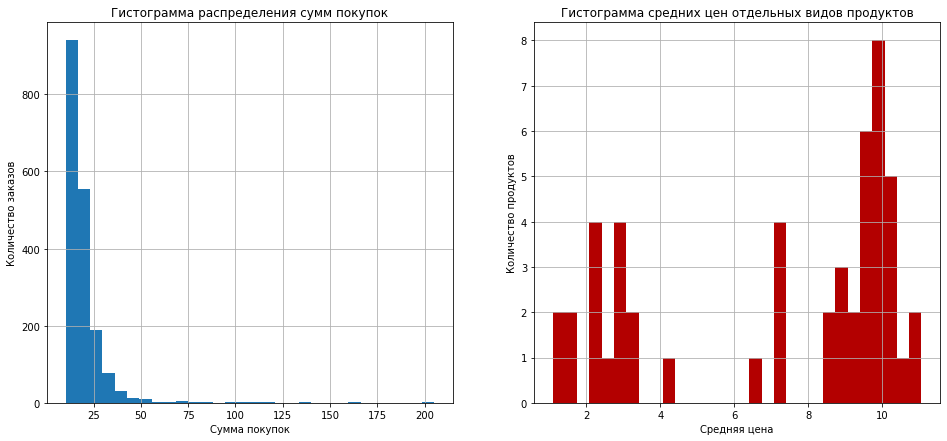

In [204]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

orders = data.groupby('order_id')['float_price'].sum()
mean_prices = data.groupby(['item_name'])['price_for_one_item'].mean()

axs[0].hist(orders, bins = 30)
axs[0].set_xlabel('Сумма покупок')
axs[0].set_ylabel('Количество заказов')
axs[0].set_title('Гистограмма распределения сумм покупок')
axs[0].grid()

axs[1].hist(mean_prices, bins = 30, color='#b30000')
axs[1].set_xlabel('Средняя цена')
axs[1].set_ylabel('Количество продуктов')
axs[1].set_title('Гистограмма средних цен отдельных видов продуктов')
axs[1].grid()

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

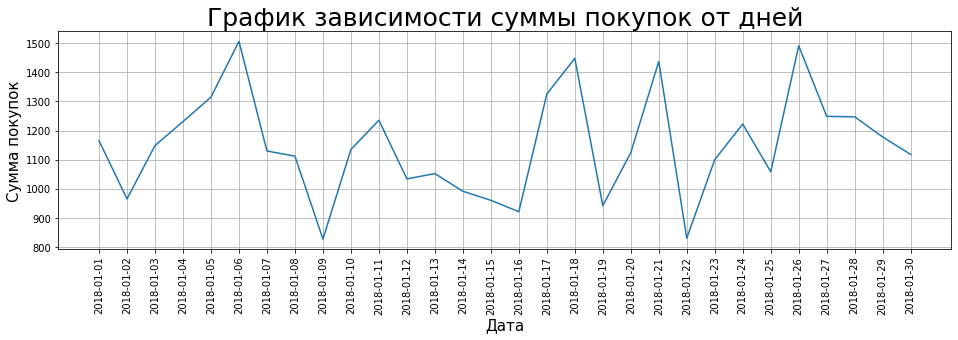

In [236]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_title('График зависимости суммы покупок от дней', fontsize = 25)
ax.set_xlabel('Дата', fontsize = 15)
ax.set_ylabel('Сумма покупок', fontsize = 15)
ax.grid()
dates = data.groupby('date')
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(np.array(dates.size().keys()), rotation = 'vertical')
ax.plot(np.array(dates['float_price'].sum()));

#### 3. [1 балл] Постройте график средних сумм покупок по дням недели (bar plot).

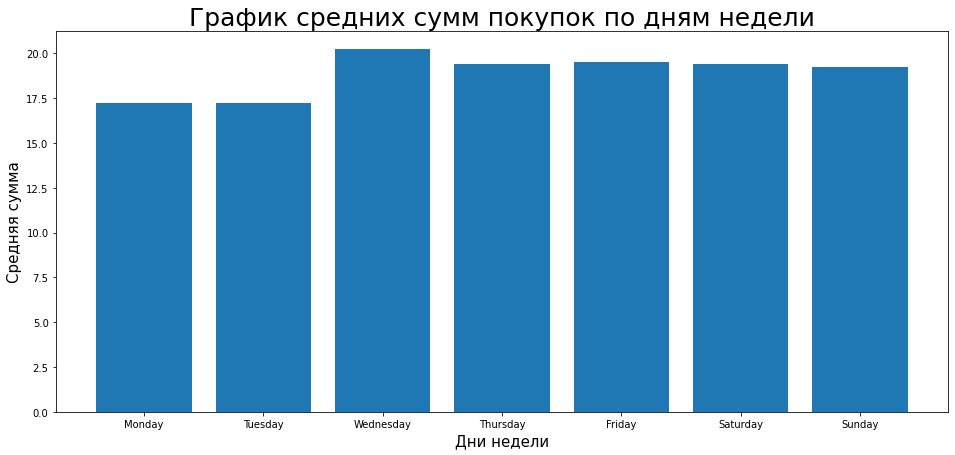

In [250]:
from datetime import datetime

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data['day_of_the_week'] = data['date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d")).dt.day_name()
plot_data = dict(data.groupby(['day_of_the_week', 'order_id'])['float_price'].sum().groupby('day_of_the_week').mean())
sorted_plot_data = {}
for i in days:
    sorted_plot_data[i] = plot_data[i]

fig, ax = plt.subplots(figsize = (16, 7))
ax.set_title('График средних сумм покупок по дням недели', fontsize = 25)
ax.set_xlabel('Дни недели', fontsize = 15)
ax.set_ylabel('Средняя сумма', fontsize = 15)
ax.bar(sorted_plot_data.keys(), sorted_plot_data.values());

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

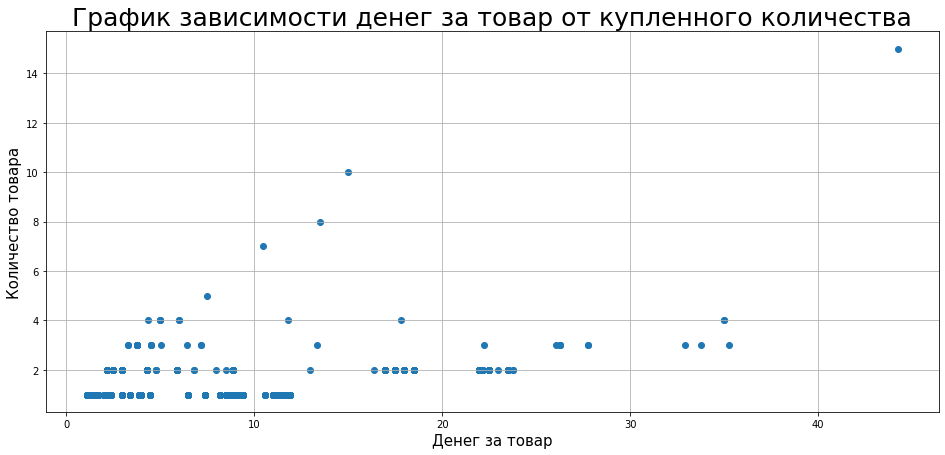

In [266]:
fig, ax = plt.subplots(figsize=(16,7))
ax.scatter(np.array(data['float_price']), np.array(data['quantity']))
ax.set_title('График зависимости денег за товар от купленного количества', fontsize = 25)
ax.set_xlabel("Денег за товар", fontsize = 15)
ax.set_ylabel("Количество товара", fontsize = 15);
ax.grid()

Сохраните график в формате pdf (так он останется векторизованным).

In [267]:
fig.savefig("graph.pdf")